学习本章代码案例的最简单方法是在Jupyter notebook进行交互式绘图。在Jupyter notebook中执行下面的语句：

%matplotlib notebook

# 9.1 matplotlib API入门 A Brief matplotlib API Primer------------------------------------

matplotlib的通常引入约定：

<IPython.core.display.Javascript object>


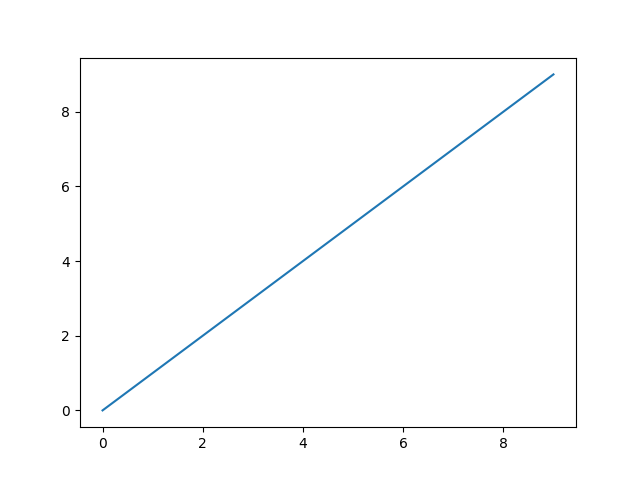

In [1]:
import matplotlib.pyplot as plt
import numpy as np

% matplotlib notebook

data = np.arange(10)

plt.plot(data)

# Figures和Subplots

matplotlib的图像都位于**Figure对象**中。你可以用plt.figure创建一个新的Figure：

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是**参数figsize**，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。

不能通过空Figure绘图。必须用**add_subplot方法**创建一个或多个subplot才行：

这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来，最终得到的图像如图9-2所示：

<IPython.core.display.Javascript object>


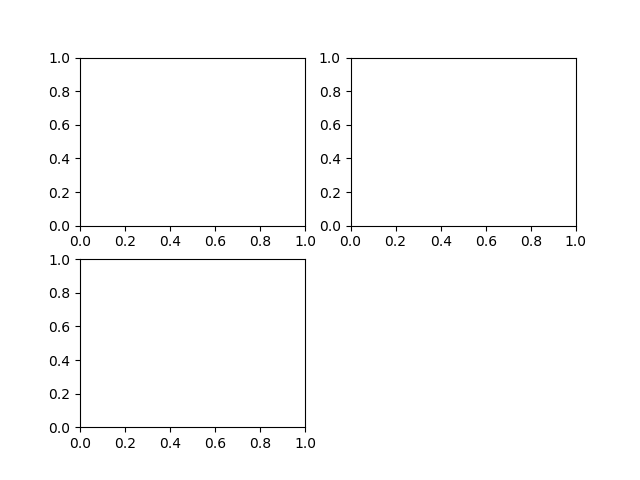

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

提示：使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。

<IPython.core.display.Javascript object>


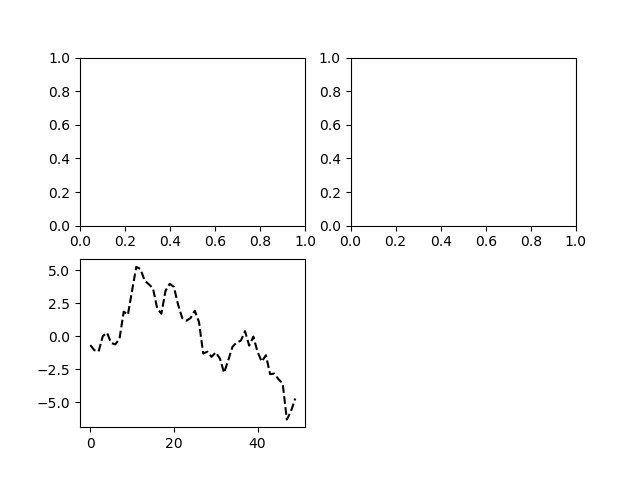

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib就会在**最后一个用过的subplot**（如果没有则创建一个）上进行绘制，隐藏创建figure和subplot的过程。因此，如果我们执行下列命令，你就会得到如图9-3所示的结果：

In [4]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是**AxesSubplot对象**，直接调用它们的实例方法就可以在其它空着的格子里面画图了，如图9-4所示：

<IPython.core.display.Javascript object>


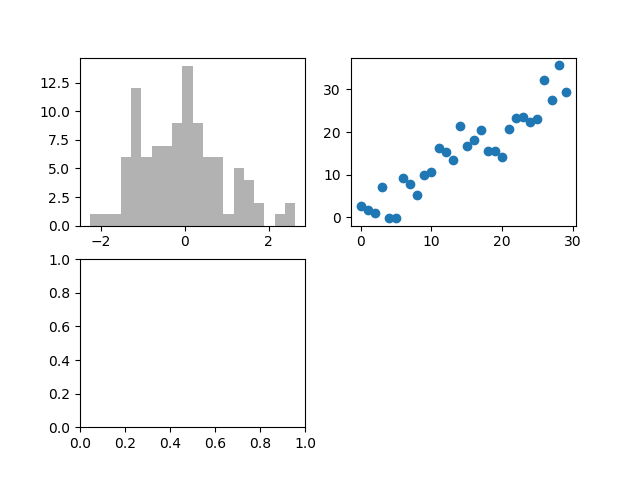

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

你可以在matplotlib的文档中找到各种图表类型。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法**plt.subplots**，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。

<IPython.core.display.Javascript object>


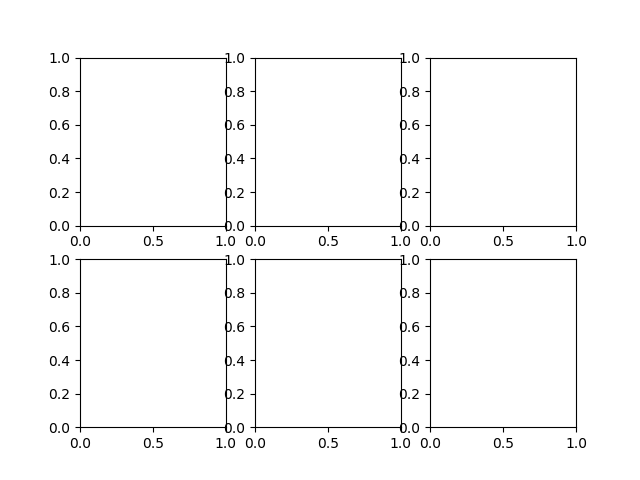

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0937B0B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0969DBF0>]], dtype=object)

In [6]:
fig, axes = plt.subplots(2, 3)
axes

> 表9-1 plt.subpots方法的参数选项：

> nrows ncols | sharex sharey | subplot_kw | \*\*fig_kw |

# 调整subplot周围的间距 Adjusting the spacing around subplots

默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。

利用**Figure的subplots_adjust方法**可以轻而易举地修改间距，此外，它也是个顶级函数：【**plt.subplots_adjust**】

**参数wspace**和**参数hspace**用于控制宽度和高度的百分比，可以用作subplot之间的间距。下面是一个简单的例子，其中我将间距收缩到了0（如图9-5所示）：

不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该内容。

<IPython.core.display.Javascript object>


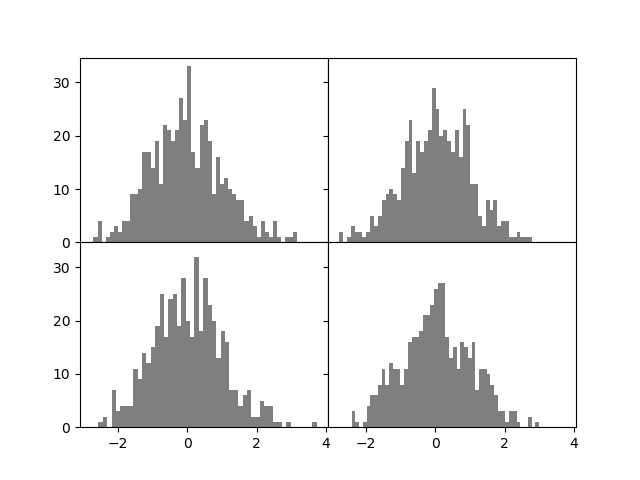

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

# 颜色、标记和线型 Colors, Markers, and Line Styles

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：【**缩写方式**】
```
ax.plot(x, y, 'g--')
```

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。通过下面这种更为明确的方式也能得到同样的效果：【**显式方式**】
```
ax.plot(x, y, linestyle='--', color='g')
```
常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。你可以通过查看plot的文档字符串查看所有线型的合集（在IPython和Jupyter中使用plot?）。【**plt.plot?帮助**】

In [55]:
plt.plot?

线图可以使用**标记强调数据点**。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面（见图9-6）：

还可以将其写成更为明确的形式：

在线型图中，非实际数据点默认是按线性方式插值的。可以通过**drawstyle选项**修改（见图9-7）：

这里，因为我们传递了label参数到plot，我们可以创建一个plot图例，指明每条使用plt.legend的线。

笔记：你必须调用plt.legend（或使用ax.legend，如果引用了轴的话）来**创建图例**，无论你绘图时是否传递label标签选项。

<IPython.core.display.Javascript object>


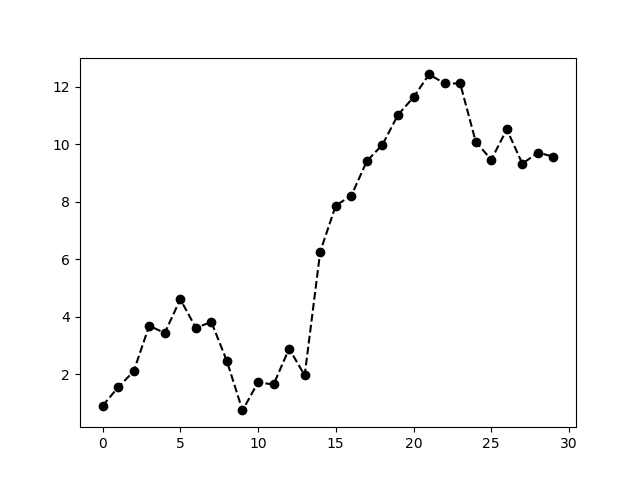

In [8]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

<IPython.core.display.Javascript object>


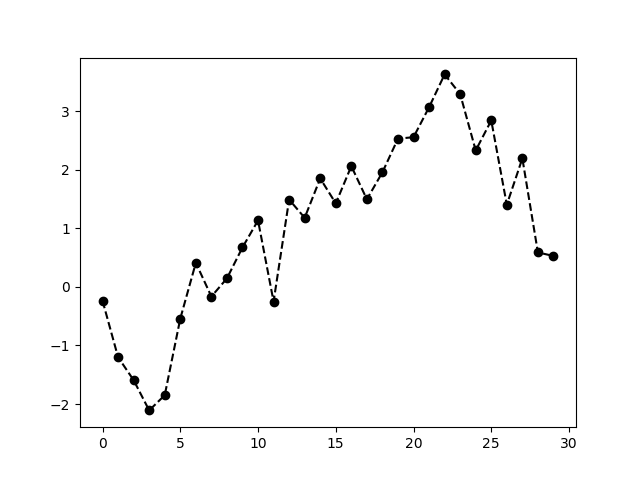

In [9]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


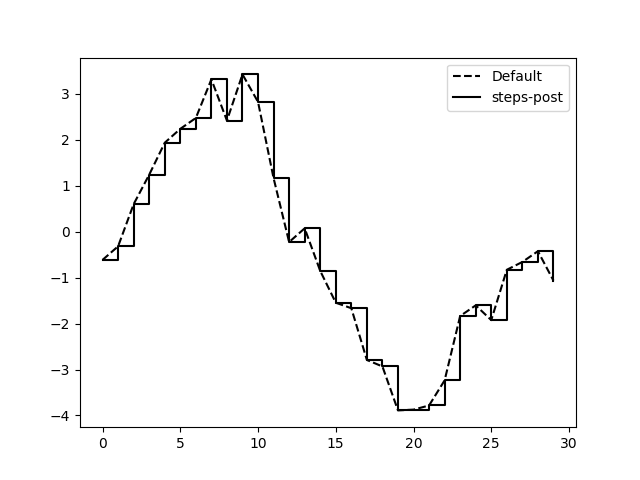

In [10]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

# 刻度、标签和图例 Ticks, Labels, and Legends

对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（例如，matplotlib.pyplot）以及更为面向对象的原生matplotlib API。

pyplot接口的设计目的就是交互式使用，含有诸如**xlim、xticks和xticklabels之类的方法**。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

> * 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。

> * 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

所有这些方法都是**对当前或最近创建的AxesSubplot起作用的**。

它们各自对应subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。我更喜欢使用subplot的实例方法（因为我喜欢明确的事情，而且在处理多个subplot时这样也更清楚一些）。当然你完全可以选择自己觉得方便的那个。

### 设置标题、轴标签、刻度以及刻度标签

为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步（如图9-8所示）：

要改变x轴刻度，最简单的办法是使用**set_xticks和set_xticklabels**。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

rotation选项设定x刻度标签倾斜30度。

最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题（见图9-9的结果）：

Y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。

轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：【**ax.set(\*\*props)**】
```
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)
```

<IPython.core.display.Javascript object>


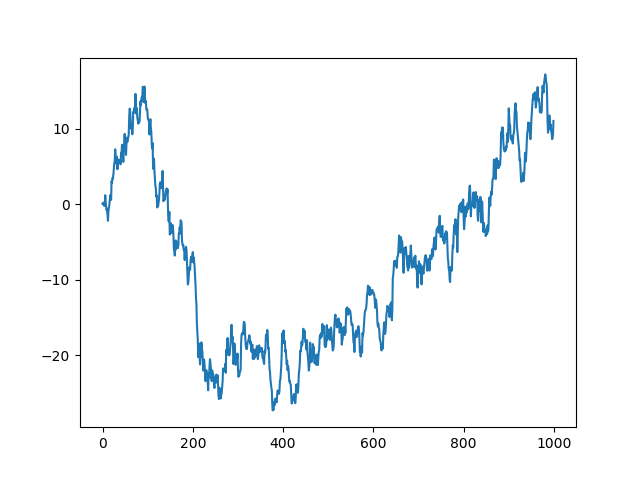

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

<IPython.core.display.Javascript object>


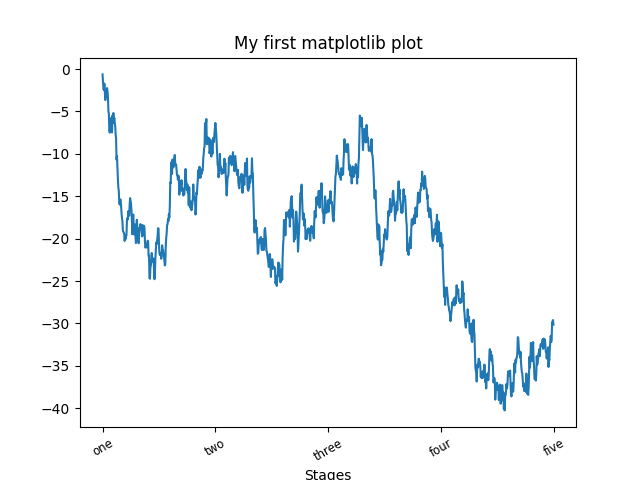

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

ax.plot(np.random.randn(1000).cumsum())

### 添加图例

图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

在此之后，你可以调用ax.legend()或plt.legend()来自动创建图例（结果见图9-10）：

loc告诉matplotlib要将图例放在哪。如果你不是吹毛求疵的话，"best"是不错的选择，因为它会选择最不碍事的位置。要从图例中去除一个或多个元素，不传入label或传入label='nolegend'即可。

<IPython.core.display.Javascript object>


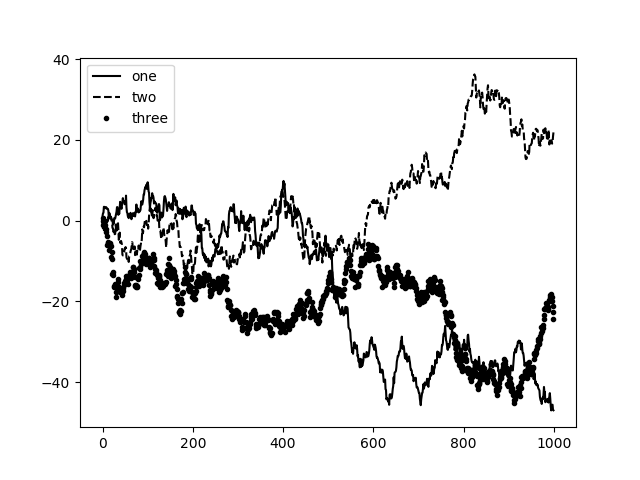

In [13]:
from numpy.random import randn

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')
# plt.lengend(loc='best')

# 注解以及在Subplot上绘图 Annotations and Drawing on a Subplot

除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过**text、arrow和annotate函数**进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：

注解中可以既含有文本也含有箭头。例如，我们根据最近的标准普尔500指数价格（来自Yahoo!Finance）绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期。你可以在Jupyter notebook的一个小窗中试验这段代码（图9-11是结果）：

这张图中有几个重要的点要强调：ax.annotate方法可以在指定的x和y坐标轴绘制标签。
我们使用set_xlim和set_ylim人工设定起始和结束边界，而不使用matplotlib的默认方法。最后，用ax.set_title添加图标标题。

<IPython.core.display.Javascript object>


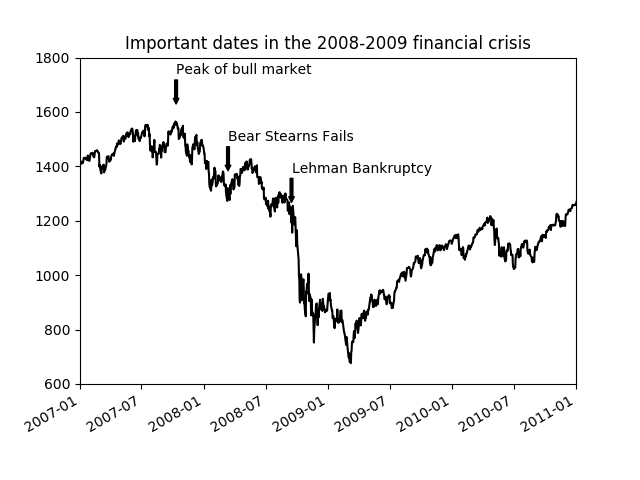

In [14]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label  in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
               xytext=(date, spx.asof(date)+225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
               horizontalalignment='left', verticalalignment='top'
               )
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

图形的绘制要麻烦一些。matplotlib有一些表示常见图形的对象。这些对象被称为**块（patch）**。其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches。

要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中（如图9-12所示）：

<IPython.core.display.Javascript object>


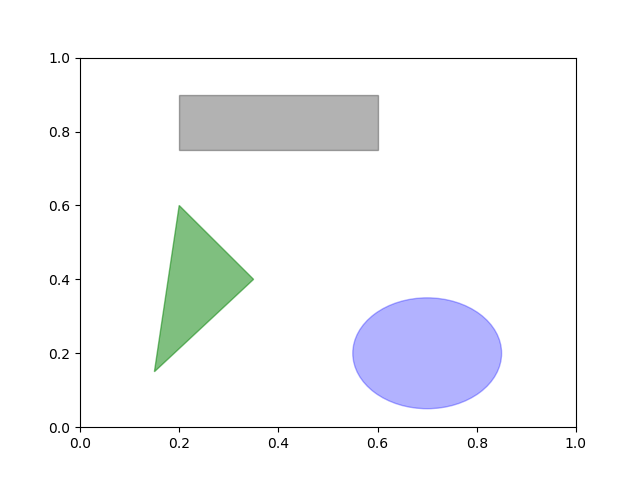

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 将图表保存到文件

利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。例如，要将图表保存为SVG文件，你只需输入：
```
plt.savefig('figpath.svg')
```

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：
```
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO：
```
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

表9-2列出了savefig的其它选项。

> fname | dpi | facecolor edgecolor | format | bbox_inches |

# matplotlib配置

matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。

一种Python编程方式配置系统的方法是使用**rc方法**。例如，要将全局的图像默认大小设置为10×10，你可以执行：
```
plt.rc('figure', figsize=(10, 10))
```

rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：
```
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

# 9.2 使用pandas和seaborn绘图---------------------------------------------------------------

matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

# 线型图 Line Plots

Series和DataFrame都有一个用于生成各类图表的**plot方法**。默认情况下，它们所生成的是线型图（如图9-13所示）：

<IPython.core.display.Javascript object>


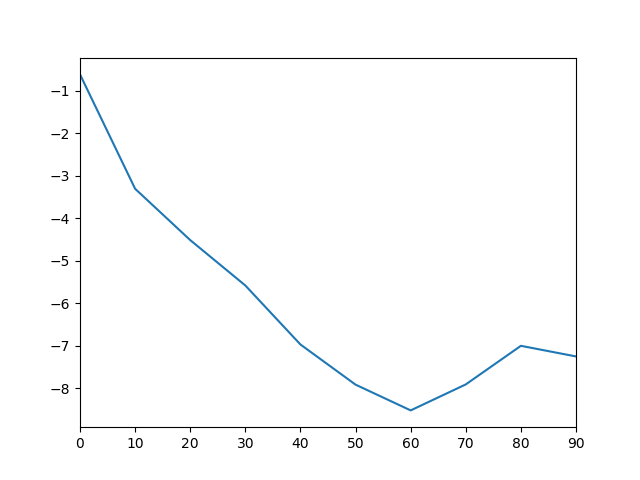

In [16]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。

plot参数的完整列表请参见表9-3。

> label | ax | style | alpha图表的填充不透明度0-1之间 | kind可以是line，bar，barh，kde | 

> logy在y轴使用对数标尺 | use_index | rot | xticks yticks xlim ylim | grid显示网格线默认打开 |

DataFrame的plot方法会在一个subplot中**为各列绘制一条线**，并自动创建图例（如图9-14所示）：

plot属性包含一批不同绘图类型的方法。例如，df.plot()等价于df.plot.line()。后面会学习这些方法。

DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个subplot中还是创建各自的subplot。

详细信息请参见表9-4。

> subplots将各个DataFrame的列绘制到单独的subplot中 |

> sharex sharey | figsize | title | legend | sort_columns以字母顺序绘制各列默认使用当前列顺序 |

<IPython.core.display.Javascript object>


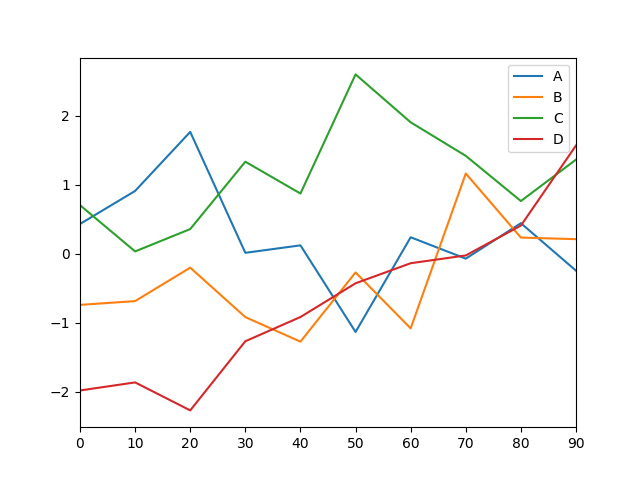

In [17]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
   ....:                   columns=['A', 'B', 'C', 'D'],
   ....:                   index=np.arange(0, 100, 10))
df.plot()

# 柱状图 Bar Plots

**plot.bar()和plot.barh()**分别绘制垂直vertical和水平horizontal的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度（如图9-15所示）：

<IPython.core.display.Javascript object>


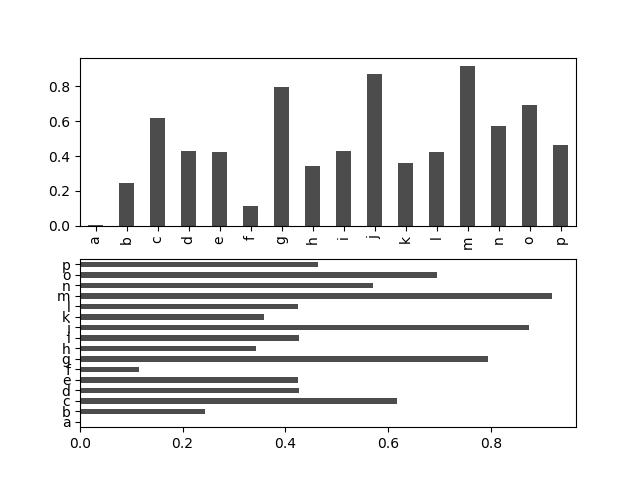

In [18]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

对于DataFrame，**柱状图会将每一行的值分为一组，并排显示**，如图9-16所示：

注意，DataFrame各列的名称"Genus"被用作了图例的标题。

设置**参数stacked=True**即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起（如图9-17所示）：

笔记：柱状图有一个非常不错的用法：利用value_counts图形化显示Series中各值的出现频率，比如s.value_counts().plot.bar()。

<IPython.core.display.Javascript object>


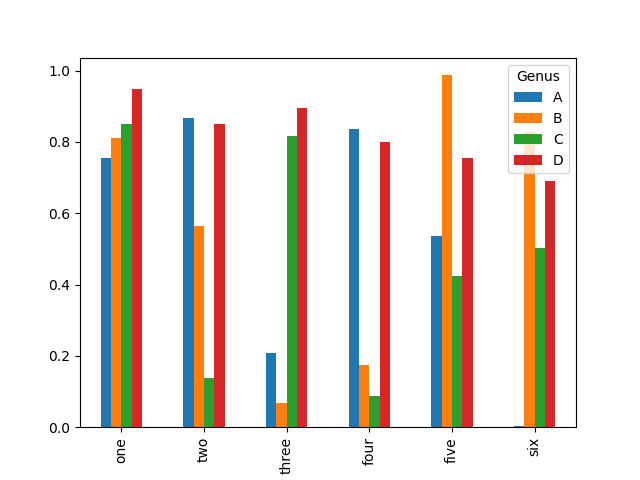

In [19]:
df = pd.DataFrame(np.random.rand(6, 4),
   ....:                   index=['one', 'two', 'three', 'four', 'five', 'six'],
   ....:                   columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

<IPython.core.display.Javascript object>


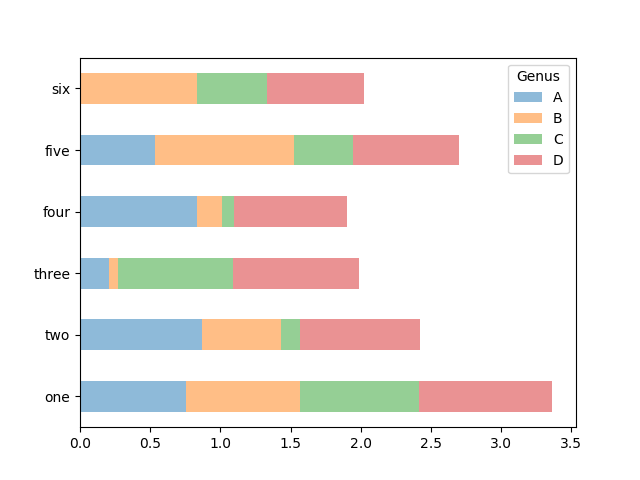

In [20]:
df.plot.barh(stacked=True, alpha=0.5)

再以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。我用read_csv将数据加载进来，然后根据日期和聚会规模创建一张交叉表：

然后进行规格化，使得各行的和为1，并生成图表（如图9-18所示）：

In [21]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])

# 剔除1和6
party_counts = party_counts.loc[:, 2:5]
party_counts
# 各行
party_counts.sum(axis=1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [22]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


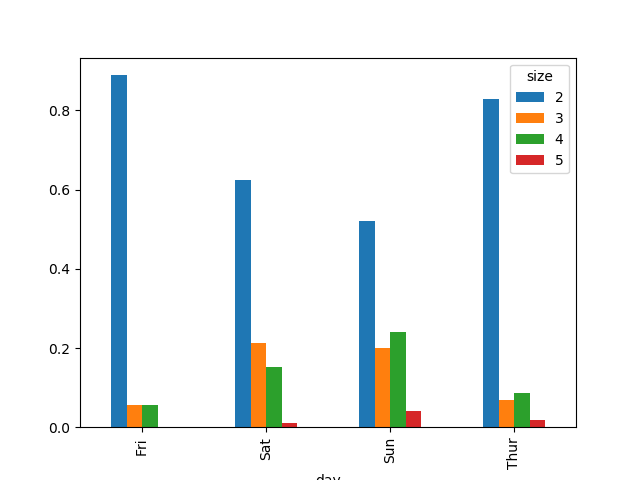

In [23]:
party_pcts.plot.bar()

对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。用seaborn来看每天的小费比例（图9-19是结果）：

seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

In [24]:
import seaborn as sns

tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


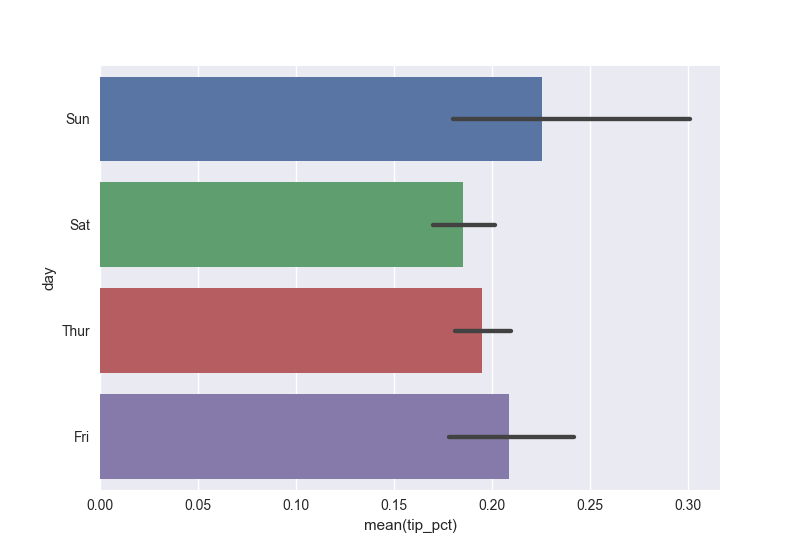

In [25]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

# 直方图和密度图 Histograms and Density Plots

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个小费数据为例，通过在Series使用**plot.hist方法**，我们可以生成一张“小费占消费总额百分比”的直方图（如图9-21所示）：

<IPython.core.display.Javascript object>


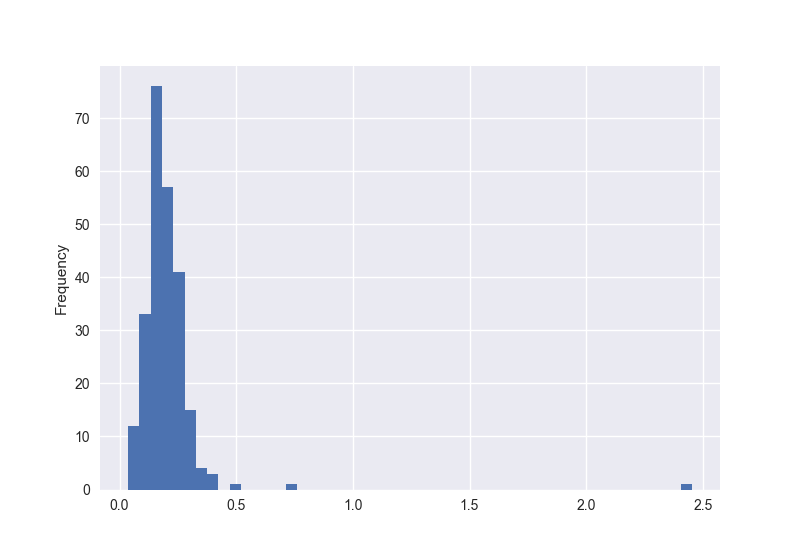

In [26]:
tips['tip_pct'].plot.hist(bins=50)

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。

使用plot.kde和标准混合正态分布估计即可生成一张密度图（见图9-22）：

<IPython.core.display.Javascript object>


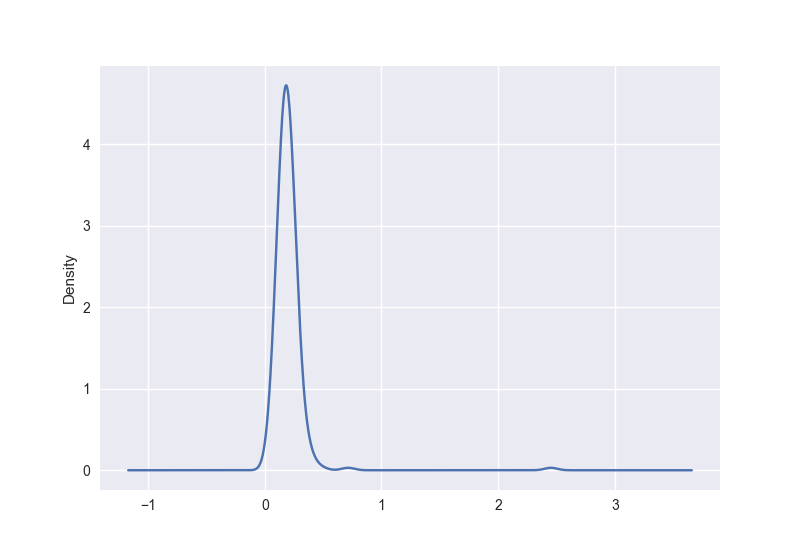

In [27]:
tips['tip_pct'].plot.density()

**seaborn的distplot方法**绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成（见图9-23）：

<IPython.core.display.Javascript object>


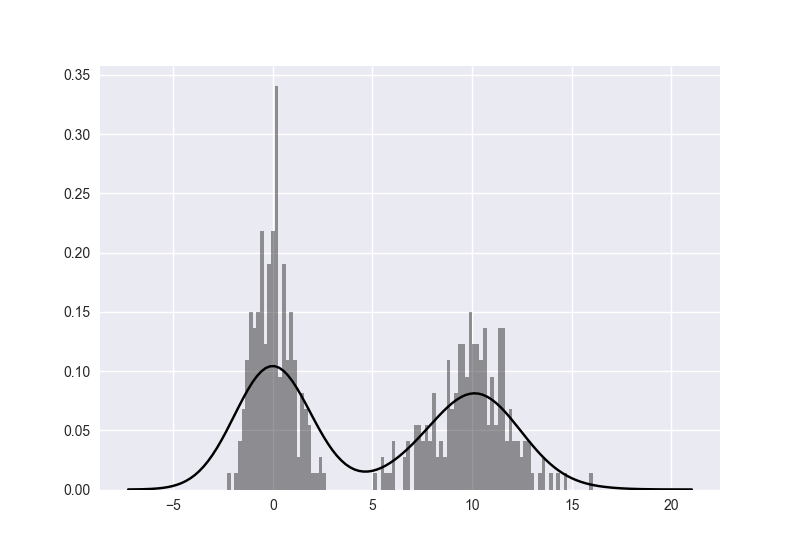

In [28]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

# 散布图或点图 Scatter or Point Plots

点图或散布图是观察*两个一维数据序列之间的关系*的有效手段。在下面这个例子中，我加载了来自statsmodels项目的macrodata数据集，选择了几个变量，然后计算对数差：

然后可以使用**seaborn的regplot方法**，它可以做一个散布图，并加上一条线性回归的线（见图9-24）：

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的**pairplot函数**，它支持在对角线上放置每个变量的直方图或密度估计（见图9-25）：

In [29]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


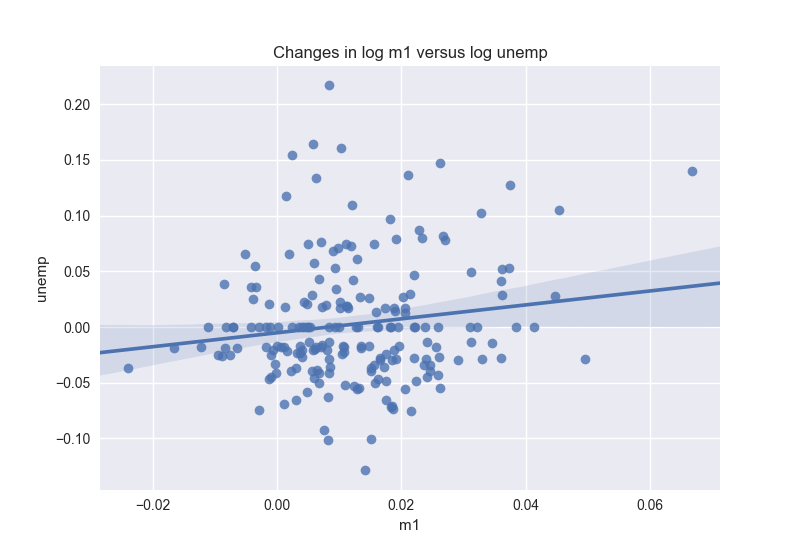

In [30]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<IPython.core.display.Javascript object>


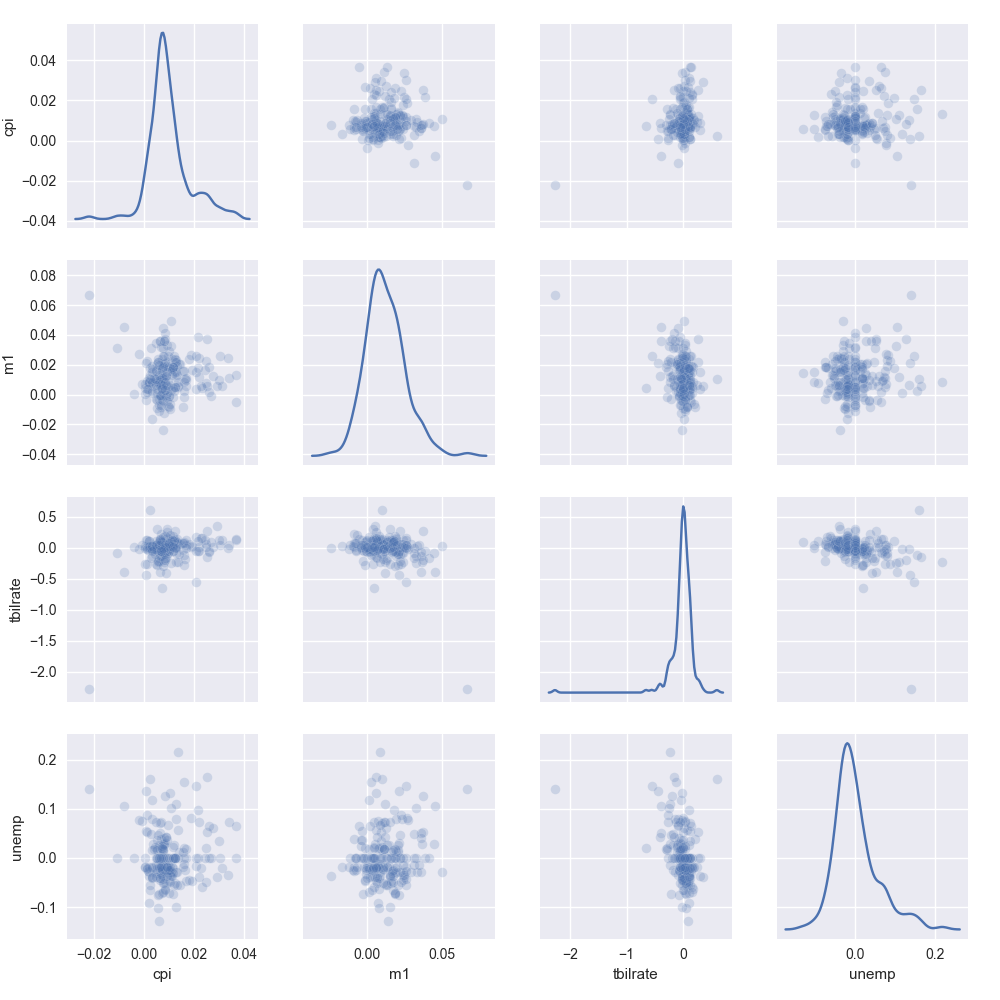

In [31]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

# 分面网格和类型数据 Facet Grids and Categorical Data

要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图（见图9-26）：

**seaborn的factorplot方法**支持其它的绘图类型，你可能会用到。例如，盒图box（它可以显示中位数，四分位数，和异常值）就是一个有用的可视化类型（见图9-28）：

使用更通用的seaborn.FacetGrid类，你可以创建自己的分面网格。请查阅seaborn的文档（https://seaborn.pydata.org/）。

<IPython.core.display.Javascript object>


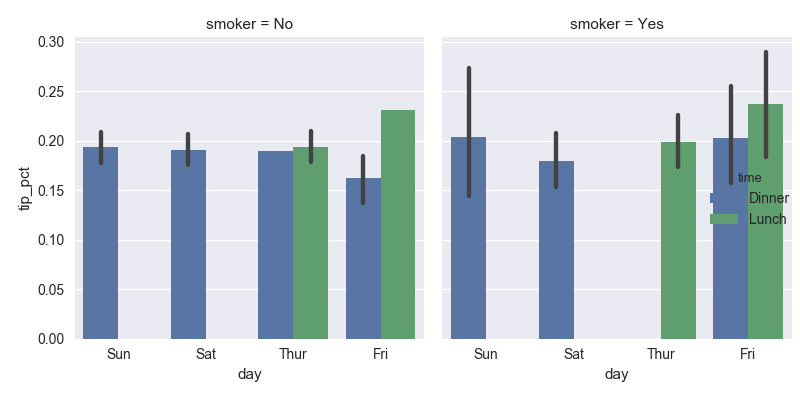

In [33]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])

<IPython.core.display.Javascript object>


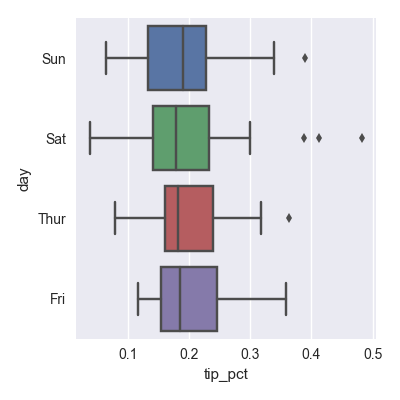

In [34]:
sns.factorplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])

# 9.3 其它的Python可视化工具--------------------------------------------------------------------

与其它开源库类似，Python创建图形的方式非常多（根本罗列不完）。自从2010年，许多开发工作都集中在创建交互式图形以便在Web上发布。利用工具如Boken（https://bokeh.pydata.org/en/latest/）和Plotly（https://github.com/plotly/plotly.py），现在可以创建动态交互图形，用于网页浏览器。

对于创建用于打印或网页的静态图形，我建议默认使用matplotlib和附加的库，比如pandas和seaborn。对于其它数据可视化要求，学习其它的可用工具可能是有用的。我鼓励你探索绘图的生态系统，因为它将持续发展。